In [1]:
import torch
import torch.nn as nn
import numpy as np
import networkx as nx
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cv2
import time

In [32]:
a = torch.zeros(3, 3)
idxx = torch.tensor([[0, 1], [1, 2], [2, 0]])
a[idxx[0,...], idxx[1,...]] = 1
print(a)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])


In [37]:
a = torch.tensor([[-3., 4.]])
print(torch.nn.functional.normalize(a))

tensor([[-0.6000,  0.8000]])


In [16]:
class Cloth(nn.Module):
    def __init__(self, height, width, spacing, mass, gravity, device="cuda"):
        super(Cloth, self).__init__() 
        self.width = width
        self.height = height
        self.spacing = spacing
        x = np.arange(0, width * spacing, spacing)
        y = np.arange(0, height * spacing, spacing)
        self.pos = torch.tensor(np.array(np.meshgrid(y, x)).T.reshape(-1, 2), dtype=torch.float32, device=device).view(height, width, 2)
        self.prev_pos = self.pos.clone()
        self.mass = mass
        self.gravity = gravity
        # print(self.pos[0][:3])
        # print(self.pos)

        self.dir = [(0, 1),(1, 0), (1, 1), (-1, 1), (0, -1), (-1, 0), (-1, -1), (1, -1)]

    def forward(self):
        force = torch.zeros_like(self.pos, device=self.pos.device)
        force[:, :, 0] = -self.gravity * self.mass
        for ii, jj in self.dir:
            diff = self.pos[max(0, -ii):self.height - max(0, ii), max(0, -jj):self.width - max(0, jj)] - self.pos[max(0, ii):self.height - max(0, -ii), max(0, jj):self.width - max(0, -jj)]
            # print(ii, jj)
            # print(max(0, -ii), self.height - max(0, ii), max(0, -jj), self.width - max(0, jj))
            # print(max(0, ii), self.height - max(0, -ii), max(0, jj), self.width - max(0, -jj))
            # print(diff)
            f = -diff * torch.norm(diff, dim=2, keepdim=True)
            force[max(0, -ii):self.height - max(0, ii), max(0, -jj):self.width - max(0, jj)] += f

        force[-1] = 0
        force[0] = 0
        # print(force)
        newpos = 2 * self.pos - self.prev_pos + force / self.mass
        vel = torch.norm(newpos - self.prev_pos, dim=2, keepdim=True)
        vel = torch.clamp(vel, 0, self.spacing*3)
        vel_dir = torch.nn.functional.normalize(newpos - self.prev_pos, dim=2)
        newpos = self.prev_pos + vel_dir * vel
        self.prev_pos = self.pos.clone()
        self.pos = newpos
        # print(force[0][:3])
        # print(self.pos[0][:3])
        # print(force.shape)

In [ ]:
# c = Cloth(40, 80, 1, 30)
wi, hi = 160, 80
c = Cloth(hi, wi, 1, 30, 0.01)

# screen 800*800
cou = 0
def plot():
    # fig = plt.figure(figsize=(8, 8), dpi=100)
    # cc = c.pos.clone()
    # x = cc[:, :, 1].cpu().numpy().flatten()
    # y = cc[:, :, 0].cpu().numpy().flatten()
    # plt.scatter(x, y, s=1, c='blue')
    # plt.xlim(-5, wi+5)
    # plt.ylim(-20, hi+5)

    # # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()

    global cou
    fig = plt.figure(figsize=(8, 8), dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    # ax.set_axis_off()
    ax.set_facecolor((0, 0, 0))
    fig.add_axes(ax)
    cc = c.pos.clone()
    x = cc[:, :, 1].cpu().numpy()
    y = cc[:, :, 0].cpu().numpy()
    plt.scatter(x, y, s=1, c='red')
    plt.xlim(-5, wi+5)
    plt.ylim(-20, hi+5)
    fig.canvas.draw()
    ww, hh = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8).reshape((hh, ww, 4))
    plt.close(fig)
    # cv2.imwrite(f"./out/im_{cou}.png", buf[..., 3::-1])
    cou += 1

    # frame = np.zeros((800, 800, 3), dtype=np.uint8)


plot()
for i in range(40):
    for j in range(100):
        c.forward()
    plot()
    print("aa")


aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa
aa


In [14]:
for i in range(40000):
    c.forward()
plot()

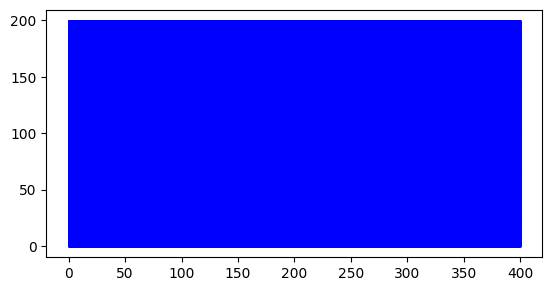

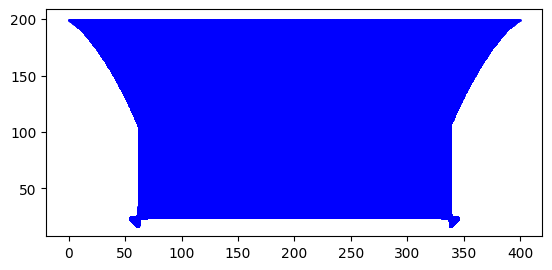

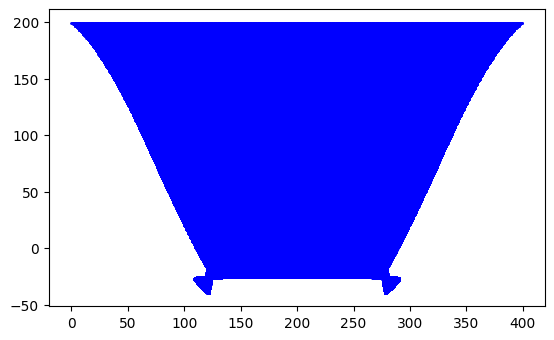

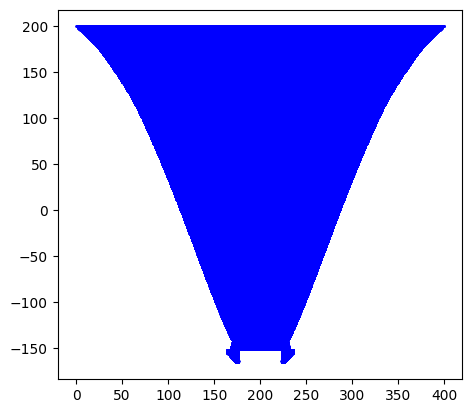

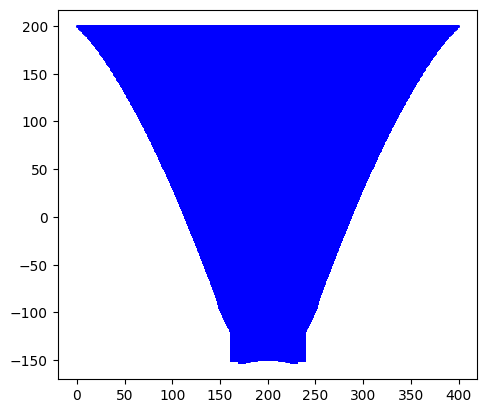

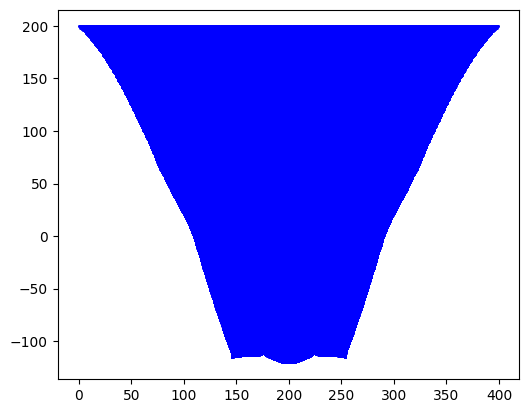

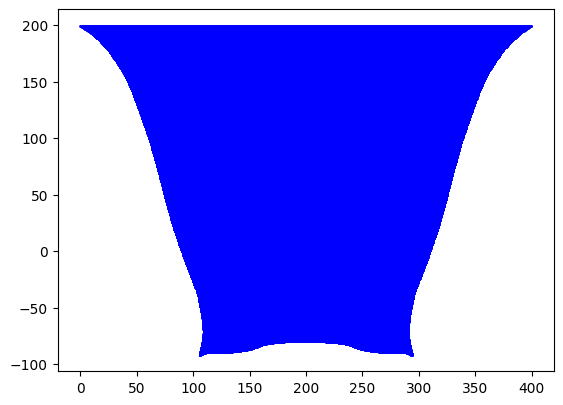

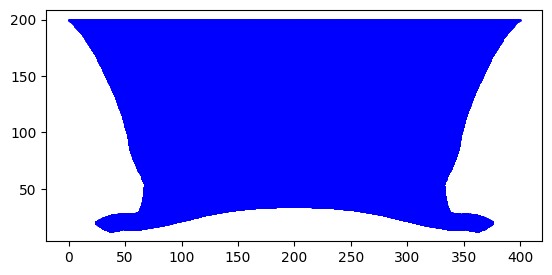

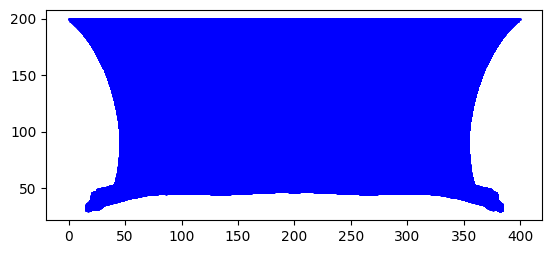

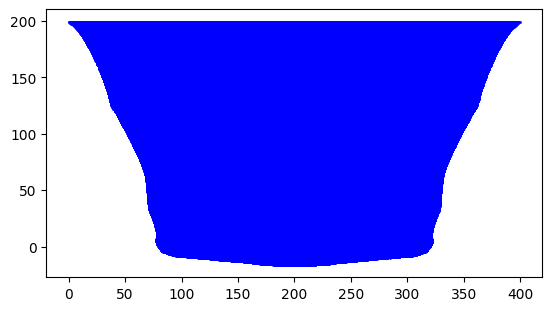

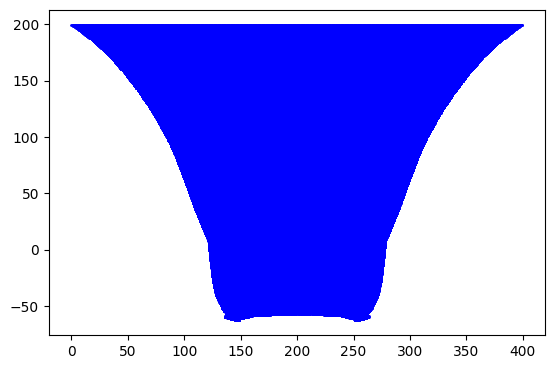

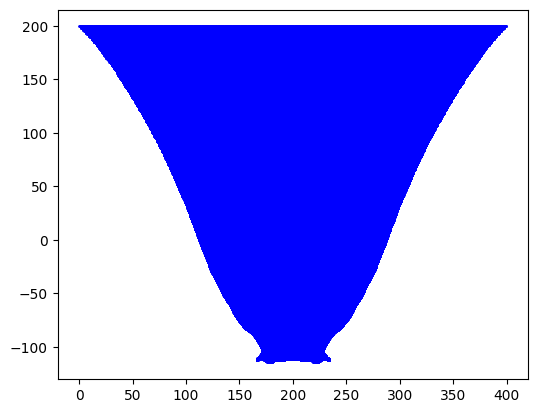

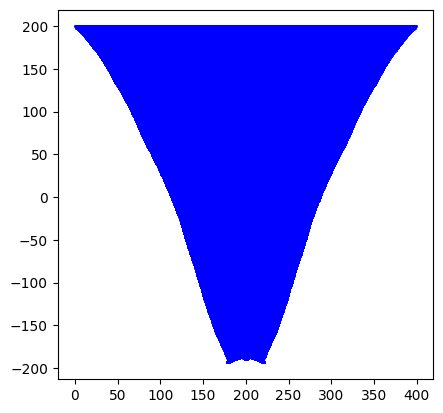

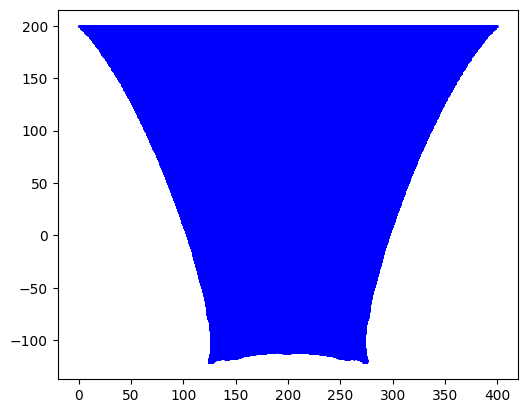

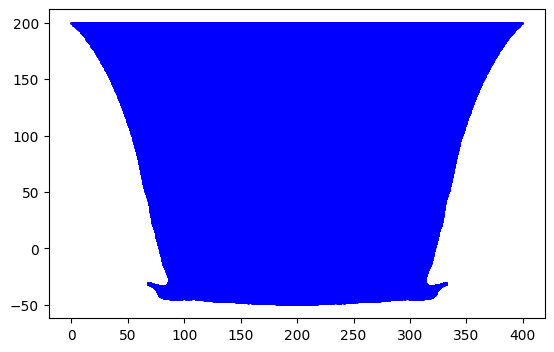

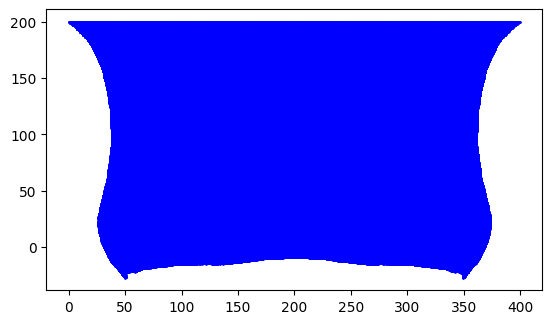

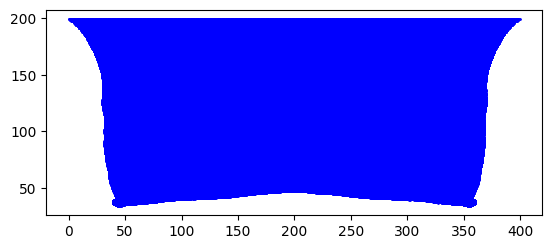

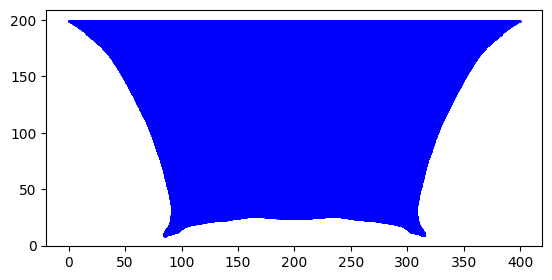

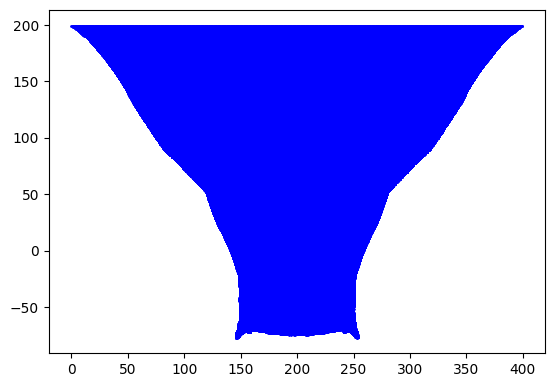

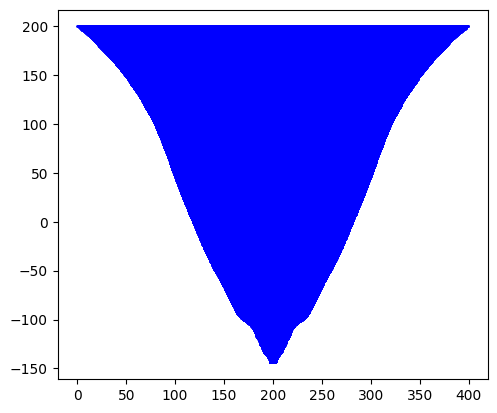

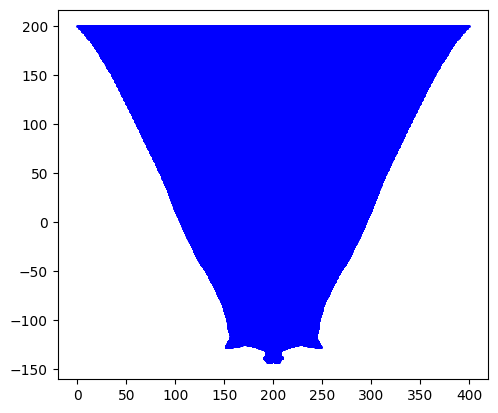

In [ ]:
# c = Cloth(400, 800, 0.5, 30, 0.0003)
# for i in range(4000):
#     c.forward()
# print("done")
# plot()
c = Cloth(hi, wi, 1, 30, 0.01)
for i in range(20):
    for j in range(500):
        c.forward()
    plot()

In [4]:
c = Cloth(400, 800, 0.5, 30, 0.0003)
for i in range(4000):
    c.forward()
    if i == 1000:
        st = time.time()
    elif i ==3000:
        et = time.time()

print("time:", et-st)

time: 0.49178576469421387
